<a href="https://colab.research.google.com/github/yje0515/PythonStudy2025/blob/main/02_02_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 02_01의 훈련세트와 테스트세트를 나누어 평가를 진행해 본 결과 문제가 발생한다
# 길이가 25cm, 무게가150g이면 사람이 판단했을 때는 도미인데 AI 는 빙어로 결론이 나온다
# 이 원인을 찾아보고 개선을 해보자.

# 전처리 데이터 앞쪽 35개는 도미(1), 뒷쪽 14개는 빙어(0) -> 총 49개의 데이터
# 도미(35개)와 빙어(14개) 데이터 49개
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
# 전에는 파이썬 리스트를 for문과 zip을 이용해서 배열로 만들었는데
# 넘파이에는 이 기능이 내장되어있는 메서드가 있다.
import numpy as np
np.column_stack(([1,2,3],[4,5,6])) # .column(열)_stack(쌓는다)
#                 길이용,무게용 -> 변환

array([[1, 4],
       [2, 5],
       [3, 6]])

In [3]:
fish_data = np.column_stack((fish_length,fish_weight))
# fish_data 변수에 2차원 배열을 넣는다 (길이,무게)
print(fish_data[:5]) # 데이터 5개 미리보기 (index 0~4)

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [5]:
# target 1 이면 도미, 0이면 빙어의 정답을 만들기
# 정답 파일을 생성한다
print(np.ones(5)) # 1로 채우기 테스트
print(np.zeros(10))# 0으로 채우기 테스트

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
fish_target = np.concatenate((np.ones(35),np.zeros(14)))
# .concatenate() 첫번째 차원을 따라 배열을 연결
# 1차원 배열(1이 35개 , 0이 14개) 도미35/빙어14
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [8]:
from sklearn.model_selection import train_test_split # 자주 쓸거에여 외우기~
# https://wikidocs.net/193722  train_test_split
train_input,test_input, train_target,test_target = train_test_split(fish_data,fish_target,stratify=fish_target,random_state=42)

print(train_input.shape, test_input.shape) # 객체,특성
# train_input 훈련용 입력값
# test_input 테스트용 입력값
# train_target 훈련용 정답
# test_target 테스트용 정답
# stratify : 타겟값을 넣어줌(target의 class 비율을 유지한 채 데이터셋을 split함)
# random_state : 시드값을 42로 지정하고 랜덤적용(수업용)

# 결과 : 랜덤하게 처리하면서 훈련용(36객체, 2특성) 테스트용(13객체,2특성)

(36, 2) (13, 2)


In [9]:
print(train_target.shape, test_target.shape) # 결과가 튜플로 나옴

(36,) (13,)


In [10]:
print(train_target) # 훈련용 정답 데이터
print(test_target) # 테스트용 검증 데이터 -> 적절하게 분배됨
# =========전처리 데이터 끝!=========

[1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.]
[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [11]:
from sklearn.neighbors import KNeighborsClassifier # K-최근접 분류 알고리즘
kn = KNeighborsClassifier() # 객체생성
kn.fit(train_input,train_target) # 전처리된 훈련용 데이터로 훈련 시작

KNeighborsClassifier()

In [12]:
kn.score(test_input,test_target) # 훈련용 데이터로 학습 후 테스트용 데이터로 평가 시작 1.0 -> 100% 과대적합

1.0

In [13]:
print(kn.predict([[25,150]])) # 도미(1)인데 빙어(0)가 나옴!!! 바보

[0.]


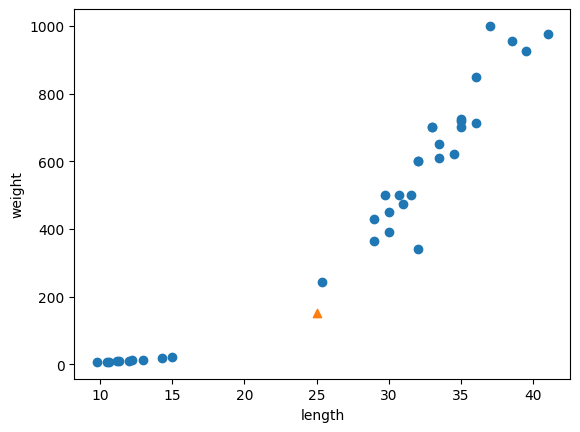

In [18]:
# 차트로 시각화
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
# https://pyvisuall.tistory.com/39 마크
plt.scatter(25,150,marker='^')
# 마커 종류 변경
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

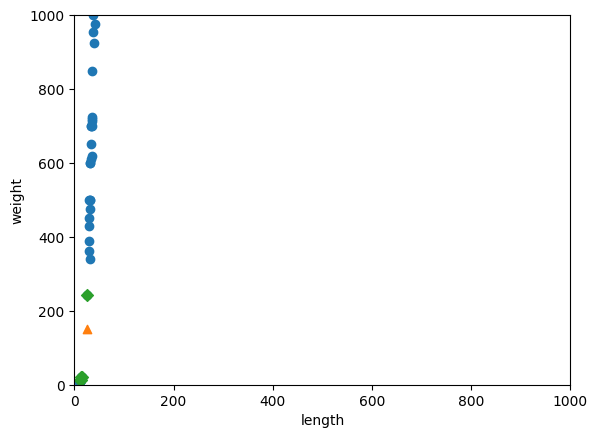

In [20]:
# 결론 x축과 y축의 비율이 다르기에 정확하게 판단할 수 없다
# K-최근접 이웃 알고리즘은 주변에 있는 5개를 보기 때문에 좀 더 알아볼 필요가 있다.
distances, indexes = kn.kneighbors([[25,150]])
# 내가 알고싶은 값의 거리와 인덱스를 알아보자.
plt.scatter(train_input[:,0],train_input[:,1]) # 입력데이터값
plt.scatter(25,150,marker='^') # 알고싶은 값
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D') # 이웃의 값
plt.xlim((0,1000)) # x축의 범위를 0~1000까지로 지정
plt.ylim((0,1000)) # y축의 범위로 0~1000까지로 지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 결론 : 녹색으로 25,150에 대한 이웃이 누군지 파악된다
# 축의 값 범위의 위험성을 알고가자

In [21]:
print(train_input[indexes]) # K-최근접 알고리즘이 근접한 5개의 값 (도미1, 빙어4 -> 그래서 도미임에도 빙어로 결과가 나옴)

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [22]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [23]:
print(distances) # 이웃간의 거리 출력

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [24]:
# 두 특성(길이,무게)의 값이 놓인 범위가 매우 다름 -> 두 특성의 스케일이 다름
# 특성간의 스케일이 다른 일은 흔히 발생한다 -> 스케일을 맞춰야함
# 특성값을 일정한 기준으로 맞춰주어야한다 (데이터전처리)

# 평균 구해보기 ( 가장 널리 사용하는 전처리 방법 : 표준점수, z점수)
# 표준 점수는 각 특성값이 평균에서 표준편차의 몇배만큼 떨어져 있는지를 나타냄
# 분산은 데이터에서 평균을 뺀 값을 모두 제곱한 다음 편균을 내어 구함
# 표준편차는 분산의 제곱근으로 데이터가 분산된 정도를 나타냄
# 표준점수는 각 데이터가 원점에서 몇 표준편차만큼 떨어져 있는지를 나타내는 값

mean = np.mean(train_input,axis=0) # 평균을 구한다 axis : 중심선
std = np.std(train_input,axis=0) # 표준편차를 구한다
#train_input -> 35개의 요소와 2개의 특성을 가짐 (36,2) 크기의 배열
# 행을 따라 각 열의 통계값을 계산함
print(mean,std)
# [ 27.29722222 454.09722222] [  9.98244253 323.29893931]
# 길이의 평균 / 무게의 평균      길이의 편차 / 무게의 편차

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [26]:
# 원본 데이터에서 평균을 배고 표준편차로 나누어 표준점수를 반환
train_scaled = (train_input-mean)/std # 표준점수 공식( 암기하기 )@@
# 원본데이터에서 평균을 빼고 표준편차로 나눔
# numpy는 train_input의 모든 행에서 mean에 있는 두 평균값을 빼줌
# std에 있는 두 표준편차를 다시 모든 행에 적용( 브로드캐스팅 )

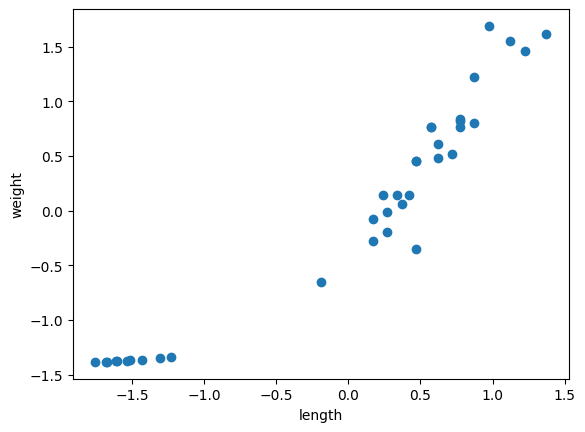

In [27]:
# 위 공식대로 적용을하면 41의 길이와 975의 무게의 스케일이 1.37, 1.61로 표준화됨
# 전처리 데이터를 이용해서 모델 훈련시키기
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 차트의 범위가 x축은 -2.0~ 1.5 / y축은 -1.5~1.5 사이로 비슷해진다.(스케일 조정 성공)
# 전에 만들었던 표준점수 이전 차트랑 비교하면 비슷한 차트가 보인다.

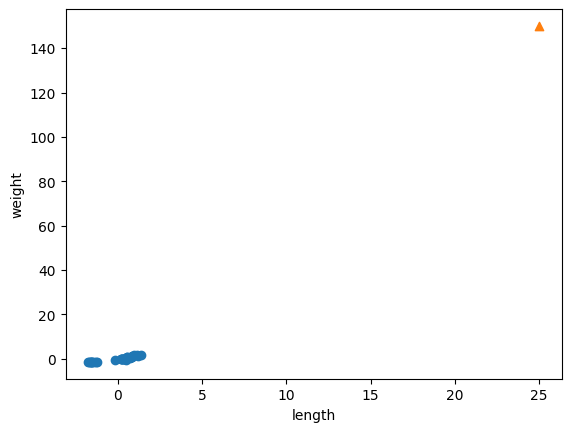

In [28]:

plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show() # 오른쪽 맨 꼭대기에 수상한 샘플이 생김..!!
# 전처리된 데이터는 표준점수를 위해서 값이 축소되어있는데
# 알고자하는 값(25,150)은 표준점수화가 안되어있다.
# 훈련세트를 평균으로빼고 표준편차로 나누어주었기 때문에 값의 범위가 달라짐ㅡ

표준점수로 변환된 (25,150) : [-0.23012627 -0.94060693]


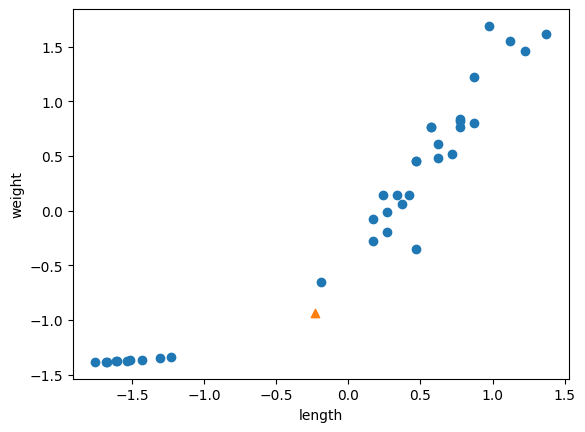

In [29]:
# 동일한 기준으로 샘플 변환하고 출력
new = ([25,150]-mean)/std
print(f"표준점수로 변환된 (25,150) : {new}")
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 알고자 하는 값도 표준점수화 했기 때문에 x축, y축의 범위가 비슷함

In [30]:
# 표준화된 전처리 데이터를 이용해서 모델 훈련시키기
kn.fit(train_scaled,train_target) # 스케일 조정된 입력값으로 훈련

KNeighborsClassifier()

In [31]:
# 테스트 진행 전 표준점수로 변환
test_scaled = (test_input-mean)/std # 표준점수화

In [32]:
kn.score(test_scaled,test_target)
print(kn.predict([new])) # 표준점수화된(25,150)
# 스케일 맞춘 전처리데이터 결과 -> 정답! 도미(1)

[1.]


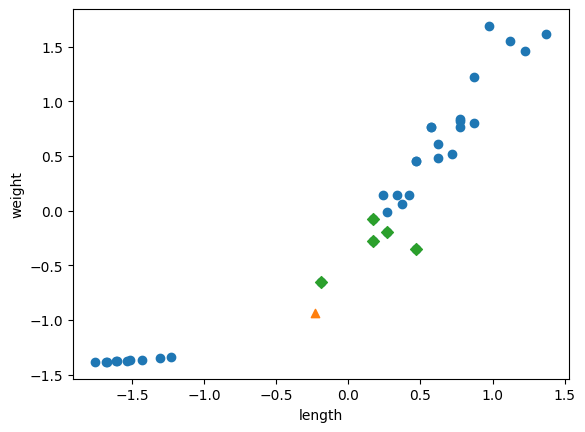

In [34]:
# kneighbors()로 최근접 이웃을 구한 다음 산점도로 그려봄
distances,indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()